# Comparison of Academia and Industry for Graduate Students

Roughly how well does pay for professors reflect market demand for PhDs? More vaguely: is it worth staying in academia? The second question is much harder to answer - and is a good topic for another blog post! The first we hope to partially answer below. We are going to look at the average pay of a full professor (courtesy of the College and University Professional Association for Human Resources) versus the median pay for (fully-employed) graduate students fresh out of grad school (courtesy of the American Community Survey 2010-2012 Public Use Microdata Series via fivethirtyeight). Note that we are comapring means with medians, so we have to be a bit wary of any conclusions drawn, although it is likely a fair assumption that the professor salaries are normally distributed (it only consists of fully tenured professors) and so their medians and means ought to be similar.

Now, the relationship between these two datasets may be nonlinear (wages in different sectors of the economy probably differ in terms of scaling, entry-level pay, etc.), so we will ask two specific questions:

1. Is the order in which universities rank professor salaries similar to the order in which industry ranks recent PhD salaries the same?


2. Are the distributions of average salaries similar in industry versus academia?

As usual, we will use the pandas package for python:

In [1]:
import pandas as pd

We will also need a package to read the messier pdf from CUPAHR. We will use tabula:

In [2]:
from tabula import read_pdf

Now, due to some white space errors, we will need to deal with page 3 of this pdf separately. First we import the other pages (1, 2 and 4) into a dataframe:

In [3]:
tables = read_pdf('https://www.cupahr.org/wp-content/uploads/2017/07/FHE-2016-2-Digit-Average-Salaries-Tenured-and-Tenure-Track.pdf', pages='1,2,4')

In [4]:
tables.head(10)

,Unnamed: 0,Unweighted Average Salary
0,Discipline and Rank,All Public Private
1,"[01.] AGRICULTURE, AGRICULTURE OPERATIONS, AND...",NaN
2,Professor,"102,328 102,691 96,185"
3,Associate Professor,"79,433 79,822 73,870"
4,Assistant Professor,"70,273 71,230 59,673"
5,New Assistant Professor,"72,135 72,581 *"
6,Instructor,* * *
7,[03.] NATURAL RESOURCES AND CONSERVATION,NaN
8,Professor,"100,200 100,512 98,627"
9,Associate Professor,"77,234 76,847 78,718"


In [5]:
tables_bad = read_pdf('https://www.cupahr.org/wp-content/uploads/2017/07/FHE-2016-2-Digit-Average-Salaries-Tenured-and-Tenure-Track.pdf', pages='3')

In [6]:
tables_bad.head(10)

,Unnamed: 0,Unnamed: 1,Unweighted Average Salary
0,NaN,Discipline and Rank,All Public Private
1,[30.] MULTI/INTERDISCIPLINARY STUDIES,NaN,NaN
2,Professor,NaN,"105,855 111,614 96,907"
3,Associate Professor,NaN,"79,387 81,362 77,121"
4,Assistant Professor,NaN,"65,466 65,423 65,514"
5,New Assistant Professor,NaN,"61,493 61,661 61,289"
6,Instructor,NaN,"49,855 * *"
7,"[31.] PARKS, RECREATION, LEISURE AND FITNESS S...",NaN,NaN
8,Professor,NaN,"89,281 91,035 85,096"
9,Associate Professor,NaN,"70,977 71,834 69,411"


It has accidentally created an unwanted extra column. We will deal with this later. The second column of the first table has the salaries we want, as well as salaries for more junior faculty. We are going to throw this away as it is not quite what we are looking for (it varies too much based on teaching needs of institutions).

In [7]:
list(tables.iloc[5].values)[1]

'72,135 72,581 *'

Since these entries are all strings with white spaces, we need a function to clean the data by:
1. Extracting the relevant part of the string (in the above case, the first 5 digit number).


2. Turning the string into an integer.

We will also drop the numbering in front of the discipline name (it is possibly arbitrary anyway, as the original pdf seems to be missing entries).

In [8]:
def main_sal(s):
    i=s.find(',')
    w=s[0:i]+s[i+1:i+4]
    return int(w)

First, import the regular expression package to search through the strings:

In [9]:
import re

Next, we will write two functions, one to clean the strings, the second to clean the columns by applying the first function to each entry.

In [10]:
def clean(s):
    if type(s)==str:
        discipline_name=re.search('\]',s)
        salary=re.match('\d',s)
        if discipline_name:
            i=discipline_name.start()
            return s[i+2:]
        elif salary:
            i=re.search('\s',s).start()
            j=re.search(',',s).start()
            return int(s[:j]+s[j+1:i])
        else:
            pass

In [11]:
def clean_list(L):
    L1=[]
    for l in L:
        if clean(l)!=None:
            L1.append(clean(l))
    return L1

Lets see if this works:

In [12]:
clean_list(['72,135 72,581 *','[30.] MULTI/INTERDISCIPLINARY STUDIES','*'])

[72135, 'MULTI/INTERDISCIPLINARY STUDIES']

OK that seems to do it. First, we'll get a list of all the rows of the dataframe (skipping the first row because it just contains the headings):

In [13]:
t=tables_bad.values
M=[]
for x in t:
    M+=(list(x))
print(M[1:])

['Discipline and Rank', 'All Public Private', '[30.] MULTI/INTERDISCIPLINARY STUDIES', nan, nan, 'Professor', nan, '105,855 111,614 96,907', 'Associate Professor', nan, '79,387 81,362 77,121', 'Assistant Professor', nan, '65,466 65,423 65,514', 'New Assistant Professor', nan, '61,493 61,661 61,289', 'Instructor', nan, '49,855 * *', '[31.] PARKS, RECREATION, LEISURE AND FITNESS STUDIES', nan, nan, 'Professor', nan, '89,281 91,035 85,096', 'Associate Professor', nan, '70,977 71,834 69,411', 'Assistant Professor', nan, '60,302 60,984 59,006', 'New Assistant Professor', nan, '61,159 62,255 57,752', 'Instructor', nan, '51,841 53,285 49,273', '[38.] PHILOSOPHY AND RELIGIOUS STUDIES', nan, nan, 'Professor', nan, '92,741 93,625 92,205', 'Associate Professor', nan, '70,937 70,635 71,136', 'Assistant Professor', nan, '59,808 59,786 59,824', 'New Assistant Professor', nan, '60,738 59,813 61,537', 'Instructor', nan, '53,166 49,580 55,318', '[39.] THEOLOGY AND RELIGIOUS VOCATIONS', nan, nan, 'Profe

Let us clean the list.

In [14]:
clean_list(M[1:])

['MULTI/INTERDISCIPLINARY STUDIES',
 105855,
 79387,
 65466,
 61493,
 49855,
 'PARKS, RECREATION, LEISURE AND FITNESS STUDIES',
 89281,
 70977,
 60302,
 61159,
 51841,
 'PHILOSOPHY AND RELIGIOUS STUDIES',
 92741,
 70937,
 59808,
 60738,
 53166,
 'THEOLOGY AND RELIGIOUS VOCATIONS',
 79838,
 65783,
 56590,
 57794,
 'PHYSICAL SCIENCES',
 97733,
 74574,
 64685,
 66108,
 54080,
 'PSYCHOLOGY',
 94218,
 71872,
 61542,
 61965,
 52924,
 'HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTING AND RELATED PROTECTIVE SERVICE',
 91192,
 72036,
 59818,
 59742,
 54395,
 'PUBLIC ADMINISTRATION AND SOCIAL SERVICE PROFESSIONS',
 99243,
 75713,
 64266,
 64477,
 51079,
 'SOCIAL SCIENCES',
 99219,
 76367,
 65446,
 67376,
 51788]

Now we only want the first number, so we will make a smaller list with just the discipline names and their corresponding salaries for full professors only:

In [15]:
L=clean_list(M[1:])
L_fixed=[[L[i],L[i+1]] for i in range(len(L)) if type(L[i])==str]

In [16]:
L_fixed

[['MULTI/INTERDISCIPLINARY STUDIES', 105855],
 ['PARKS, RECREATION, LEISURE AND FITNESS STUDIES', 89281],
 ['PHILOSOPHY AND RELIGIOUS STUDIES', 92741],
 ['THEOLOGY AND RELIGIOUS VOCATIONS', 79838],
 ['PHYSICAL SCIENCES', 97733],
 ['PSYCHOLOGY', 94218],
 ['HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTING AND RELATED PROTECTIVE SERVICE',
  91192],
 ['PUBLIC ADMINISTRATION AND SOCIAL SERVICE PROFESSIONS', 99243],
 ['SOCIAL SCIENCES', 99219]]

This looks good. Lets put it in a neww dataframe:

In [17]:
tables_good=pd.DataFrame(L_fixed)

In [18]:
tables_good.columns=['Discipline','Average Professor Salary']

In [19]:
tables_good

,Discipline,Average Professor Salary
0,MULTI/INTERDISCIPLINARY STUDIES,105855
1,"PARKS, RECREATION, LEISURE AND FITNESS STUDIES",89281
2,PHILOSOPHY AND RELIGIOUS STUDIES,92741
3,THEOLOGY AND RELIGIOUS VOCATIONS,79838
4,PHYSICAL SCIENCES,97733
5,PSYCHOLOGY,94218
6,"HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTI...",91192
7,PUBLIC ADMINISTRATION AND SOCIAL SERVICE PROFE...,99243
8,SOCIAL SCIENCES,99219


Now we'll clean the rest of the data. First, lets print of a list of the rows: 

In [20]:
t2=tables.values
M2=[]
for x in t2:
    M2+=list(x)
print(M2[1:])

['All Public Private', '[01.] AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', nan, 'Professor', '102,328 102,691 96,185', 'Associate Professor', '79,433 79,822 73,870', 'Assistant Professor', '70,273 71,230 59,673', 'New Assistant Professor', '72,135 72,581 *', 'Instructor', '* * *', '[03.] NATURAL RESOURCES AND CONSERVATION', nan, 'Professor', '100,200 100,512 98,627', 'Associate Professor', '77,234 76,847 78,718', 'Assistant Professor', '66,397 66,806 64,390', 'New Assistant Professor', '70,753 70,924 *', 'Instructor', '* * *', '[04.] ARCHITECTURE AND RELATED SERVICES', nan, 'Professor', '108,653 110,056 102,031', 'Associate Professor', '83,470 82,532 87,671', 'Assistant Professor', '67,821 67,626 68,668', 'New Assistant Professor', '68,848 68,532 70,680', 'Instructor', '* * *', '[05.] AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES', nan, 'Professor', '107,572 107,836 106,779', 'Associate Professor', '79,123 77,193 83,554', 'Assistant Professor', '65,560 64,404 68,755',

The rest is the same as for the previous part of the data.

In [21]:
L2=clean_list(M2[1:])
L2_fixed=[[L2[i],L2[i+1]] for i in range(len(L2)) if type(L2[i])==str]

In [22]:
L2_fixed

[['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 102328],
 ['NATURAL RESOURCES AND CONSERVATION', 100200],
 ['ARCHITECTURE AND RELATED SERVICES', 108653],
 ['AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES', 107572],
 ['COMMUNICATION, JOURNALISM AND RELATED PROGRAMS', 92241],
 ['COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SUPPORT SERVICES', 94089],
 ['COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES', 113646],
 ['EDUCATION', 92764],
 ['ENGINEERING', 129012],
 ['ENGINEERING TECHNOLOGIES AND ENGINEERING RELATED FIELDS', 97103],
 ['FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS', 94698],
 ['FAMILY AND CONSUMER SCIENCES/HUMAN SCIENCES', 99572],
 ['LEGAL PROFESSIONS AND STUDIES', 145732],
 ['ENGLISH LANGUAGE AND LITERATURE/LETTERS', 87735],
 ['LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND HUMANITIES', 91954],
 ['LIBRARY SCIENCE', 88531],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 103879],
 ['MATHEMATICS AND STATISTICS', 94710],
 ['TRANSPORTATION AND MATERIAL SERVICES', 9

Finally we join them together and get a dataframe:

In [23]:
Lf_fixed=L_fixed+L2_fixed
Lf_fixed.sort()
df_prof=pd.DataFrame(Lf_fixed)
df_prof.columns=[['discipline','average_professor_salary']]

In [24]:
df_prof.head()

,discipline,average_professor_salary
0,"AGRICULTURE, AGRICULTURE OPERATIONS, AND RELAT...",102328
1,ARCHITECTURE AND RELATED SERVICES,108653
2,"AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES",107572
3,BIOLOGICAL AND BIOMEDICAL SCIENCES,103879
4,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",129904


In [25]:
df_prof.describe()

,average_professor_salary
count,32.000000
mean,100037.375000
std,13729.242248
min,79838.000000
25%,92169.250000
50%,95906.500000
75%,104373.000000
max,145732.000000


We now have half of our dataframe. The other half comes from the student median wage data:

In [26]:
df_student=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/grad-students.csv')

In [27]:
df_student.columns

Index(['Major_code', 'Major', 'Major_category', 'Grad_total',
       'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round',
       'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_median', 'Grad_P25',
       'Grad_P75', 'Nongrad_total', 'Nongrad_employed',
       'Nongrad_full_time_year_round', 'Nongrad_unemployed',
       'Nongrad_unemployment_rate', 'Nongrad_median', 'Nongrad_P25',
       'Nongrad_P75', 'Grad_share', 'Grad_premium'],
      dtype='object')

We only need one of these columns, 'Grad_median'. The top of the table looks like this:

In [28]:
df_student.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


First, let's get a list of all the majors:

In [29]:
L=sorted(list(df_student['Major'].unique()))

Then, let's make a smaller dataframe with the only information we will be using. We are keeping track of sample size because we will have to combine some student subjects, since they were classified into a larger set of disciplines.

In [30]:
df_student_sub=df_student[['Major','Grad_median','Grad_sample_size']]

In [31]:
df_student_sub.shape

(173, 3)

So we have 173 disciplines, versus the 32 for the professor salary dataframe. In order to combine them we will merge student disciplines under professor disciplines in an essentially <i>ad hoc</i> manner, throwing some out a couple but keeping most in. It may have been more accurate (and it certainly would have been quicker!) to throw away all but those that share essentially the same name, but that would be ignoring a lot of the data. We will then calculate a 'weighted median', which will be the mean of all the student medians falling under the same professor discipline, weighted by sample size. This statistic is <i>prima facie</i> a bit of a mutant, but, assuming the student salaries are normally distributed, this ought to give the mean graduate student starting salary for someone from that discipline.

In [32]:
L

['ACCOUNTING',
 'ACTUARIAL SCIENCE',
 'ADVERTISING AND PUBLIC RELATIONS',
 'AEROSPACE ENGINEERING',
 'AGRICULTURAL ECONOMICS',
 'AGRICULTURE PRODUCTION AND MANAGEMENT',
 'ANIMAL SCIENCES',
 'ANTHROPOLOGY AND ARCHEOLOGY',
 'APPLIED MATHEMATICS',
 'ARCHITECTURAL ENGINEERING',
 'ARCHITECTURE',
 'AREA ETHNIC AND CIVILIZATION STUDIES',
 'ART AND MUSIC EDUCATION',
 'ART HISTORY AND CRITICISM',
 'ASTRONOMY AND ASTROPHYSICS',
 'ATMOSPHERIC SCIENCES AND METEOROLOGY',
 'BIOCHEMICAL SCIENCES',
 'BIOLOGICAL ENGINEERING',
 'BIOLOGY',
 'BIOMEDICAL ENGINEERING',
 'BOTANY',
 'BUSINESS ECONOMICS',
 'BUSINESS MANAGEMENT AND ADMINISTRATION',
 'CHEMICAL ENGINEERING',
 'CHEMISTRY',
 'CIVIL ENGINEERING',
 'CLINICAL PSYCHOLOGY',
 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
 'COMMERCIAL ART AND GRAPHIC DESIGN',
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
 'COMMUNICATION TECHNOLOGIES',
 'COMMUNICATIONS',
 'COMMUNITY AND PUBLIC HEALTH',
 'COMPOSITION AND RHETORIC',
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECU

The corresponding list of professor disciplines is

In [33]:
df_prof['discipline']

,discipline
0,"AGRICULTURE, AGRICULTURE OPERATIONS, AND RELAT..."
1,ARCHITECTURE AND RELATED SERVICES
2,"AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES"
3,BIOLOGICAL AND BIOMEDICAL SCIENCES
4,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S..."
5,"COMMUNICATION, JOURNALISM AND RELATED PROGRAMS"
6,COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SU...
7,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...
8,EDUCATION
9,ENGINEERING


We now set up a dictionary that sends the student discipline to our chosen over-arching professor discipline. This was saved in a separate file due to its unsightly length, and can be found on github [here](https://github.com/dhughesln3/python_industry_versus_academia/blob/master/academia_dict.py). It will allow us to merge the two datasets.

In [34]:
from academia_dict import d

In [35]:
Disciplines=set(d.values())

Now we convert the student dataframe into a list

In [36]:
student_list=list(map(list,list(df_student_sub.values)))

In [37]:
student_list

[['CONSTRUCTION SERVICES', 75000.0, 200],
 ['COMMERCIAL ART AND GRAPHIC DESIGN', 60000.0, 882],
 ['HOSPITALITY MANAGEMENT', 65000.0, 437],
 ['COSMETOLOGY SERVICES AND CULINARY ARTS', 47000.0, 72],
 ['COMMUNICATION TECHNOLOGIES', 57000.0, 171],
 ['COURT REPORTING', 75000.0, 22],
 ['MARKETING AND MARKETING RESEARCH', 80000.0, 3738],
 ['AGRICULTURE PRODUCTION AND MANAGEMENT', 67000.0, 386],
 ['COMPUTER PROGRAMMING AND DATA PROCESSING', 85000.0, 98],
 ['ADVERTISING AND PUBLIC RELATIONS', 60000.0, 688],
 ['FILM VIDEO AND PHOTOGRAPHIC ARTS', 57000.0, 370],
 ['ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION',
  62000.0,
  45],
 ['MECHANICAL ENGINEERING RELATED TECHNOLOGIES', 78000.0, 111],
 ['MASS MEDIA', 57000.0, 828],
 ['TRANSPORTATION SCIENCES AND TECHNOLOGIES', 90000.0, 538],
 ['COMPUTER NETWORKING AND TELECOMMUNICATIONS', 80000.0, 218],
 ['MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION', 75000.0, 408],
 ['MISCELLANEOUS ENGINEERING TECHNOLOGIES', 80000.0, 315],
 ['INDUS

The function we use to clean it up uses the dictionary from earlier to changing the student discipline name to the professor discipline name

In [38]:
def student_cleaner(L):
    result=[]
    for l in L:
        try:
            r=[d[l[0]],l[1],l[2]]
            result.append(r)
        except:
            pass
    return result

In [39]:
cleaned_student_list=student_cleaner(student_list)

Next, we sort the list alphabetically

In [40]:
cleaned_student_list.sort(key= lambda x:x[0])

Finally,we work out the overall averages using the sample sizes and medians

In [41]:
final_student_list=[]
n=len(cleaned_student_list)
x=cleaned_student_list[0]
x[1]=x[2]*x[1]
for i in range(1,n):
    y=cleaned_student_list[i]
    if x[0]==y[0]:
        x[2]+=y[2]
        x[1]+=y[1]*y[2]
    else:
        z=[x[0],x[1]/x[2]]
        final_student_list.append(z)
        x=y
        x[1]=x[1]*x[2]
z=[x[0],x[1]/x[2]]
final_student_list.append(z)

The cleaned list now looks like this

In [42]:
cleaned_student_list

[['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES',
  247129500.0,
  3573],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 68000.0, 764],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 67000.0, 624],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 80000.0, 305],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 65000.0, 61],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 70300.0, 1335],
 ['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 54000.0, 98],
 ['ARCHITECTURE AND RELATED SERVICES', 198720000.0, 2760],
 ['AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES', 117975000.0, 1573],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 3421360000.0, 37189],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 80000.0, 326],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 79000.0, 898],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 60000.0, 848],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 70000.0, 1172],
 ['BIOLOGICAL AND BIOMEDICAL S

In [43]:
final_student_list.sort(key=lambda x:x[0])

And the final list looks like this (no duplicates)

In [44]:
final_student_list

[['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES',
  69165.82703610412],
 ['ARCHITECTURE AND RELATED SERVICES', 72000.0],
 ['AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES', 75000.0],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 91999.24708919304],
 ['BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES',
  86578.54412497922],
 ['COMMUNICATION, JOURNALISM AND RELATED PROGRAMS', 65133.81178377127],
 ['COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SUPPORT SERVICES', 57000.0],
 ['COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES', 91934.52929834856],
 ['EDUCATION', 57852.47434124681],
 ['ENGINEERING', 100540.72605698393],
 ['ENGLISH LANGUAGE AND LITERATURE/LETTERS', 66786.87589158345],
 ['FAMILY AND CONSUMER SCIENCES/HUMAN SCIENCES', 58000.0],
 ['FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS', 70911.69521559362],
 ['HEALTH PROFESSIONS AND RELATED PROGRAMS', 85326.133776383],
 ['HISTORY GENERAL', 80052.72526913622],
 ['HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTING

Now, we return to the list for professor salary. We are going to add on the student salary. First, we'll set up a dictionary that gets rid of any professor disciplines that have no corresponding student disciplines:

In [45]:
rev_d={x:True for x in Disciplines}
prof_list=[]
for l in Lf_fixed:
    try:
        rev_d[l[0]]
        prof_list.append(l)
    except:
        pass
prof_list.sort(key = lambda x:x[0])

Then we add the student salary onto the professor salary list:

In [46]:
n=len(prof_list)
comparison_list=[]
for i in range(n):
    if final_student_list[i][0]==prof_list[i][0]:
        comparison_list.append([prof_list[i][0],round(final_student_list[i][1]),prof_list[i][1]])
    else:
        print('Error here:',i)
        break

And here is the full list:

In [47]:
comparison_list

[['AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES', 69166, 102328],
 ['ARCHITECTURE AND RELATED SERVICES', 72000, 108653],
 ['AREA, ETHNIC, CULTURAL, GENDER AND GROUP STUDIES', 75000, 107572],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 91999, 103879],
 ['BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES',
  86579,
  129904],
 ['COMMUNICATION, JOURNALISM AND RELATED PROGRAMS', 65134, 92241],
 ['COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SUPPORT SERVICES',
  57000,
  94089],
 ['COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES', 91935, 113646],
 ['EDUCATION', 57852, 92764],
 ['ENGINEERING', 100541, 129012],
 ['ENGLISH LANGUAGE AND LITERATURE/LETTERS', 66787, 87735],
 ['FAMILY AND CONSUMER SCIENCES/HUMAN SCIENCES', 58000, 99572],
 ['FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS', 70912, 94698],
 ['HEALTH PROFESSIONS AND RELATED PROGRAMS', 85326, 108064],
 ['HISTORY GENERAL', 80053, 89536],
 ['HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTING AND RELATED PROTECTI

Finally, we turn it inot a dataframe:

In [48]:
df_comparison=pd.DataFrame(comparison_list)

In [49]:
df_comparison.columns=[['discipline','weighted_median_grad_salary','mean_prof_salary']]

In [50]:
df_comparison.describe()

,weighted_median_grad_salary,mean_prof_salary
count,31.000000,31.000000
mean,73320.451613,100132.032258
std,14081.149252,13945.568659
min,48000.000000,79838.000000
25%,63375.500000,92097.500000
50%,70912.000000,94710.000000
75%,85967.500000,104867.000000
max,100541.000000,145732.000000


In [51]:
import statsmodels.api as sm

First, let's look at a linear regression:

In [52]:
X=df_comparison['weighted_median_grad_salary']
X1=sm.add_constant(X)
Y=df_comparison['mean_prof_salary']
model = sm.OLS(Y,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ('mean_prof_salary',)   R-squared:                       0.267
Model:                               OLS   Adj. R-squared:                  0.242
Method:                    Least Squares   F-statistic:                     10.58
Date:                   Sat, 22 Jun 2019   Prob (F-statistic):            0.00290
Time:                           18:03:10   Log-Likelihood:                -334.49
No. Observations:                     31   AIC:                             673.0
Df Residuals:                         29   BIC:                             675.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             6.259e+04   1.17e+04      5.329      0.000    3.86e+04    8.66e+04
('weighted_median_grad_salary',)     0.5120      0.157      3.252      0.003       0.190       0.834
==============================================================================
Omnibus:                       23.726   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.321
Skew:                           1.768   Prob(JB):                     1.06e-09
Kurtosis:                       7.415   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Here is a plot of that regression:

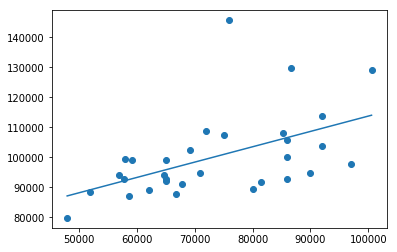

In [54]:
X=np.array(df_comparison['weighted_median_grad_salary'])
Y=np.array(df_comparison['mean_prof_salary'])
pay_model=linear_model.LinearRegression()
pay_model.fit(X,Y)
prediction=pay_model.predict(np.sort(X, axis=0))

plt.scatter(X, Y)
plt.plot(np.sort(X, axis=0),prediction)
plt.show()

The slope is less than 1, so increases in graduate salaries do not drive commensurate increases in professor pay. However, we wish to know whether they <i>rank</i> them in the same order. So we calculate Spearman's rank coefficient. The advantage here is that it only looks for monotonic relationships between the salaries, so it ignores a lot of the nonlinearity that may come from considering people at different points in different careers.

In [55]:
df_comparison.corr(method='spearman')

,weighted_median_grad_salary,mean_prof_salary
weighted_median_grad_salary,1.000000,0.603226
mean_prof_salary,0.603226,1.000000


This gives an $R^2$ correlation coefficient of

In [56]:
0.603226**2

0.36388160707600004

which is rather low, if we were expecting the academy to respond to the same demands as the broader job market. We conclude that academic pay ranking is not explained well by graduate job market pay ranking.

Now, how robust is this number? Can we conclude anything from this? Well, it is worth comparing pay in academia versus in industry, as chances are one is potentially more lucrative than the other.

We will now perform a Wilcoxon signed-rank test on the predicted Mean Professor Salary versus the observered Mean Professor Salary. This will test if the populations have the same distribution, i.e. if their paired differences follow a (roughly normal) symmetric distribution. Specifically, it will output a $p$-value giveing the probability of the previous statement.

In [57]:
from scipy import stats

A bit more data cleaning (we are adding the predicted Professor Salary into our dataframe):

In [58]:
L=sorted(comparison_list, key = lambda x:x[1])
predict_prof_list=[[L[i][0],round(float(prediction[i]))] for i in range(31)]
predict_prof_list.sort(key= lambda x:x[0])

In [59]:
df_comparison['predicted_prof_salary']=list(map(lambda x:x[1],predict_prof_list))

In [60]:
df_comparison.describe()

,weighted_median_grad_salary,mean_prof_salary,predicted_prof_salary
count,31.000000,31.000000,31.000000
mean,73320.451613,100132.032258,100132.000000
std,14081.149252,13945.568659,7208.978106
min,48000.000000,79838.000000,87169.000000
25%,63375.500000,92097.500000,95040.500000
50%,70912.000000,94710.000000,98899.000000
75%,85967.500000,104867.000000,106606.500000
max,100541.000000,145732.000000,114068.000000


It looks like it worked. Now we apply the Wilcoxon test to the rightmost two columns. First, we turn them into lists so scipy can do its thing:

In [61]:
L_obs=list(map(float,df_comparison['mean_prof_salary'].values))
L_pred=list(map(lambda x:x[1],predict_prof_list))

In [62]:
stats.wilcoxon(L_pred,L_obs)

WilcoxonResult(statistic=211.0, pvalue=0.46840775868536677)

This is not very helpful. It says that, based on our data, the probability that overall industry salaries are distributed similarly to salaries in academia is about $47\%$. The test would probably be more conclusive if we examined each subject individually, since some of the differences in ranking are large, while others are small. The ones with large difference are possibly where there is significant difference in distribution.

Now, which ones are those? Well, we can look at the list of differences, sort them by size and find out.

In [63]:
diff_list=[[c[0],sorted(comparison_list,key=lambda x:x[1]).index(c)-sorted(comparison_list,key=lambda x:x[2]).index(c)] for c in comparison_list]

In [64]:
diff_list.sort(key=lambda x:x[1],reverse=True)

In [65]:
diff_list

[['HISTORY GENERAL', 14],
 ['LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND HUMANITIES', 13],
 ['PHYSICAL SCIENCES', 13],
 ['MATHEMATICS AND STATISTICS', 11],
 ['TRANSPORTATION AND MATERIAL SERVICES', 11],
 ['ENGLISH LANGUAGE AND LITERATURE/LETTERS', 10],
 ['HOMELAND SECURITY, LAW ENFORCEMENT, FIREFIGHTING AND RELATED PROTECTIVE SERVICE',
  7],
 ['BIOLOGICAL AND BIOMEDICAL SCIENCES', 6],
 ['NATURAL RESOURCES AND CONSERVATION', 4],
 ['VISUAL AND PERFORMING ARTS', 4],
 ['PARKS, RECREATION, LEISURE AND FITNESS STUDIES', 3],
 ['COMMUNICATION, JOURNALISM AND RELATED PROGRAMS', 2],
 ['ENGINEERING', 2],
 ['FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS', 1],
 ['COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES', 0],
 ['MULTI/INTERDISCIPLINARY STUDIES', 0],
 ['PHILOSOPHY AND RELIGIOUS STUDIES', 0],
 ['THEOLOGY AND RELIGIOUS VOCATIONS', 0],
 ['LIBRARY SCIENCE', -2],
 ['BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES', -4],
 ['HEALTH PROFESSIONS AND RELATED PROGRAMS', -4],
 [

So our data suggest that historians, humanities graduates, physicists and mathematicians are underpaid as professors relative to the rest of the job market, whereas the (seemingly more vocational) degree holders near the bottom of the list are not. 